In [1]:
import os
import sys

from PIL import Image 
import torch 
import torch.nn.functional as F

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt 

In [2]:

os.getcwd()

'/Users/ray/Documents/Research Assistancy UofA 2025/Reproduce Paper/contrastive-abstraction-RL/notebooks'

In [3]:
def load_image(path, size=(128, 128)): 
    transform = transforms.Compose(
        [
            transforms.Grayscale(), 
            transforms.Resize(size=size), 
            transforms.ToTensor(),
        ]
    )

    img = Image.open(path)
    img = transform(img)
    img = img.flatten() 

    return img

def show_image(a): 
    plt.imshow(a, cmap='gray')
    plt.axis('off')
    plt.show()

In [13]:
def update_rule(X, xi, beta=8.0): 
    print("X size", X.size())
    print("xi size", xi.size())

    sims = X @ xi  # X is size (N, d), xi is size (d,1)
    print("sims:", sims)
    print(sims.size())
 
    p = F.softmax(beta* sims, dim=0, dtype=torch.float32) # p is size (N,1), the probability for each pattern
    print("p:", p)
    print(p.size())

    X_T = X.transpose(0, 1) 
    xi_new = X_T @ p  # xi_new of size (d, 1) since (d, N) x (N, 1)
 
    print("xi_new:", xi_new)
    print(xi_new.size())

    return xi_new

def run_iterations(X, xi0, beta=None, updates=5): 
    assert beta != None, "Must have a value for beta."

    xi = xi0.clone()
    history = [xi.clone()] 
    for _ in range(updates): 
        xi = update_rule(X, xi, beta=beta) 
        history.append(xi.clone()) 
    return history   

def visualize_cchn_learning(history, size = (128,128)): 
    fig, axes = plt.subplots(1, len(history), figsize= (15,3))
    for i, xi in enumerate(history):
        axes[i].imshow(xi.reshape(size), cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Step {i}")
    plt.show() 

In [5]:
IMAGES = ["Bart.jpg", "Homer.jpg", "Lisa.jpg", "Maggie.jpg", "Marge.jpg", "Millhouse.jpg"]
PATH = os.getcwd() + "/../The Simpsons/"


imgs = []
for i in range(len(IMAGES)): 
    imgs.append(load_image(PATH+IMAGES[i]))

X = torch.stack(imgs, axis=0) # X = (N,d), N patterns, d pixels
X.size()

torch.Size([6, 16384])

In [6]:
img = load_image(PATH+IMAGES[0])
xi0 = img.flatten()
xi0[len(xi0) // 2: ]  = 0 
xi0 = xi0.unsqueeze(1)
#show_image(xi0)

In [7]:
print(X.size())
print(xi0.size())

torch.Size([6, 16384])
torch.Size([16384, 1])


In [14]:
history = run_iterations(X, xi0, beta=100, updates=3)

X size torch.Size([6, 16384])
xi size torch.Size([16384, 1])
sims: tensor([[6741.7979],
        [6604.0996],
        [6302.2510],
        [6180.5269],
        [5578.4194],
        [5753.1094]])
torch.Size([6, 1])
p: tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
torch.Size([6, 1])
xi_new: tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])
torch.Size([16384, 1])
X size torch.Size([6, 16384])
xi size torch.Size([16384, 1])
sims: tensor([[13294.0791],
        [12601.0918],
        [12500.6914],
        [11460.0918],
        [11190.3516],
        [12242.8574]])
torch.Size([6, 1])
p: tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
torch.Size([6, 1])
xi_new: tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])
torch.Size([16384, 1])
X size torch.Size([6, 16384])
xi size torch.Size([16384, 1])
sims: tensor([[13294.0791],
       

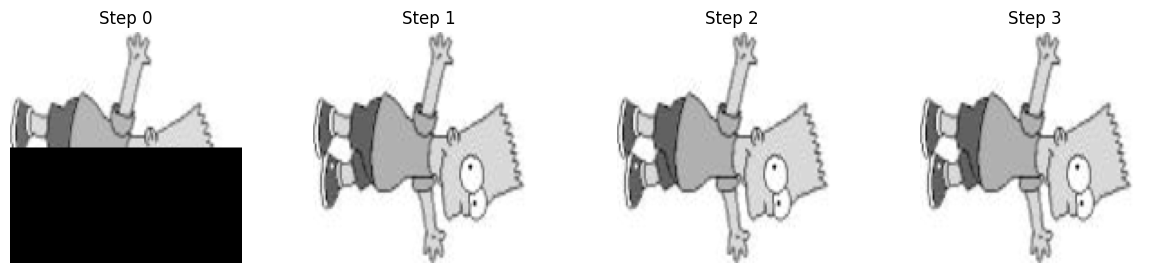

In [15]:
visualize_cchn_learning(history)

In [18]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path: 
    sys.path.insert(0, project_root)
print(sys.path)


from models.cmhn import cmhn 

n = cmhn() 
u = n.run(X, xi0, 100)
u.size()

['/Users/ray/Documents/Research Assistancy UofA 2025/Reproduce Paper/contrastive-abstraction-RL', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/ray/Documents/Research Assistancy UofA 2025/Reproduce Paper/contrastive-abstraction-RL/CL_RL/lib/python3.9/site-packages', '/var/folders/89/s23t762151989wcy_1bx9vqc0000gn/T/tmpwxnpplpo']


torch.Size([16384, 1])